<a href="https://colab.research.google.com/github/Vanagand/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Unit_2_Sprint_3_Module_1_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---



# Define ML problems
- Choose a target to predict, and check its distribution
- Avoid leakage of information from test to train or from target to features
- Choose an appropriate evaluation metric


### Setup


In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Choose a target to predict, and check its distribution

## Overview

This is the data science process at a high level:

<img src="https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295">

—Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

We've focused on the 2nd arrow in the diagram, by training predictive models. Now let's zoom out and focus on the 1st arrow: defining problems, by translating business questions into code/data questions.

Last sprint, you did a Kaggle Challenge. It’s a great way to practice model validation and other technical skills. But that's just part of the modeling process. [Kaggle gets critiqued](https://speakerdeck.com/szilard/machine-learning-software-in-practice-quo-vadis-invited-talk-kdd-conference-applied-data-science-track-august-2017-halifax-canada?slide=119) because some things are done for you: Like [**defining the problem!**](https://www.linkedin.com/pulse/data-science-taught-universities-here-why-maciej-wasiak/) In today’s module, you’ll begin to practice this objective, with your dataset you’ve chosen for your personal portfolio project.

When defining a supervised machine learning problem, one of the first steps is choosing a target to predict.

Which column in your tabular dataset will you predict?

Is your problem regression or classification? You have options. Sometimes it’s not straightforward, as we'll see below.

- Discrete, ordinal, low cardinality target: Can be regression or multi-class classification.
- (In)equality comparison: Converts regression or multi-class classification to binary classification.
- Predicted probability: Seems to [blur](https://brohrer.github.io/five_questions_data_science_answers.html) the line between classification and regression.

## Follow Along

Let's reuse the [Burrito reviews dataset.](https://nbviewer.jupyter.org/github/LambdaSchool/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/LS_DS_214_assignment.ipynb) 🌯


In [0]:
import pandas as pd
pd.options.display.max_columns = None
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

### Choose your target 

Which column in your tabular dataset will you predict?


In [0]:
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df['overall'].describe()



count    421.000000
mean       3.620887
std        0.755718
min        1.000000
25%        3.100000
50%        3.800000
75%        4.100000
max        5.000000
Name: overall, dtype: float64

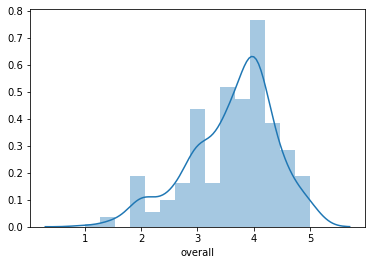

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df['overall'])

In [0]:
df['Great'] = df['overall'] >= 4


In [0]:
df['Great']

0      False
1      False
2      False
3      False
4       True
       ...  
418    False
419     True
420    False
421     True
422     True
Name: Great, Length: 423, dtype: bool

### How is your target distributed?

For a classification problem, determine: How many classes? Are the classes imbalanced?

In [0]:
y = df['Great']
y.unique()

array([False,  True])

In [0]:
y.value_counts(normalize=True)

False    0.56974
True     0.43026
Name: Great, dtype: float64

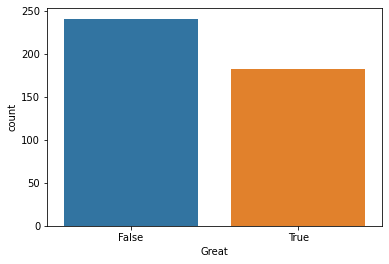

In [0]:
sns.countplot(y)

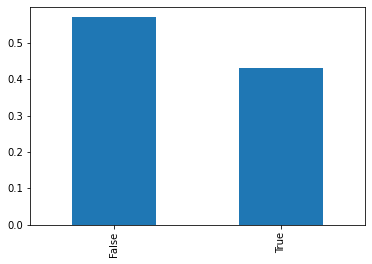

In [0]:
y.value_counts(normalize=True).plot(kind="bar")



In [0]:
# Stretch: how to fix imbalanced classes
#.  upsampling:  randomly re-sample from the minority class to increase the sample in the minority class
#.  downsampling: random re-sampling from the majority class to decrease the sample in the majority class

# Why does it matter if we have imbalanced classes?
# 1:1000 tested positive:tested negative
#    99.99% accuracy
# 

# Avoid leakage of information from test to train or from target to features

## Overview

Overfitting is our enemy in applied machine learning, and leakage is often the cause.

> Make sure your training features do not contain data from the “future” (aka time traveling). While this might be easy and obvious in some cases, it can get tricky. … If your test metric becomes really good all of the sudden, ask yourself what you might be doing wrong. Chances are you are time travelling or overfitting in some way. — [Xavier Amatriain](https://www.quora.com/What-are-some-best-practices-for-training-machine-learning-models/answer/Xavier-Amatriain)

Choose train, validate, and test sets. Are some observations outliers? Will you exclude them? Will you do a random split or a time-based split? You can (re)read [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/).

## Follow Along

First, begin to **explore and clean your data.**

In [0]:
df['Burrito'].nunique()

132

In [0]:
df['Burrito'].unique()

array(['California ', 'Carnitas', 'Carne asada', 'California',
       'combo chicken', 'Monster California', 'Carne Asada',
       'Surf & Turf', 'Chile verde pork', 'battered fish ',
       'Surf and turf ', 'Adobada ', 'Barbacoa', '2 in 1', 'Adobado',
       'Shredded beef', 'Hawaiian', 'Bandido', 'Campeon', 'carne asada',
       'California chicken', 'Azteca', 'Lobster', 'Al pastor', 'Custom',
       'Machaca', 'Quesaburro', 'Philly ', 'Quesa', 'Surf and turf',
       'Mahi', 'Addiction', 'Oaxacalifornia', "Deborah's special",
       'Chicken nopalito', 'Adobada', 'Chicken', 'California Everything',
       'Chile relleno and carnitas', 'California (only cheese)', 'Fish',
       'Chimichanga beef', 'Pastor', 'El Hawaiiano ', 'Shrimp',
       'El Rusio', 'Bacon breakfast', 'Chile Relleno', 'Bomb', 'Arizona',
       'California Burrito', '619 Burrito Original', 'Chicken asada',
       'Carne adobada ', 'Bean and cheese', 'Pokirrito classic ',
       'Mauna Lani', 'Especial ', 'Ranchero

In [0]:
# Combine Burrito categories
df['Burrito_rename'] = df['Burrito'].str.lower()

# All burrito types that contain 'California' are grouped into the same
#. category. Similar logic applied to asada, surf, and carnitas.

# 'California Surf and Turf'
california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito_rename'] = 'California'
df.loc[asada, 'Burrito_rename'] = 'Asada'
df.loc[surf, 'Burrito_rename'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito_rename'] = 'Carnitas'

# If the burrito is not captured in one of the above categories, it is put in the 
# 'Other' category.
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito_rename'] = 'Other'

df[['Burrito', 'Burrito_rename']]

SyntaxError: ignored

In [0]:
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 61 columns):
Burrito           423 non-null object
Date              423 non-null object
Yelp              87 non-null float64
Google            87 non-null float64
Chips             26 non-null object
Cost              416 non-null float64
Hunger            420 non-null float64
Mass (g)          22 non-null float64
Density (g/mL)    22 non-null float64
Length            284 non-null float64
Circum            282 non-null float64
Volume            282 non-null float64
Tortilla          423 non-null float64
Temp              403 non-null float64
Meat              409 non-null float64
Fillings          420 non-null float64
Meat:filling      414 non-null float64
Uniformity        421 non-null float64
Salsa             398 non-null float64
Synergy           421 non-null float64
Wrap              420 non-null float64
overall           421 non-null float64
Rec               233 non-null object
Unrelia

In [0]:
df.isna().sum().sort_values()

Burrito       0
Tortilla      0
Great         0
Date          0
overall       2
           ... 
Sushi       421
Carrots     422
Zucchini    422
Lobster     422
Queso       423
Length: 61, dtype: int64

In [0]:
df = df.fillna('Missing')


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 61 columns):
Burrito           423 non-null object
Date              423 non-null object
Yelp              423 non-null object
Google            423 non-null object
Chips             423 non-null object
Cost              423 non-null object
Hunger            423 non-null object
Mass (g)          423 non-null object
Density (g/mL)    423 non-null object
Length            423 non-null object
Circum            423 non-null object
Volume            423 non-null object
Tortilla          423 non-null float64
Temp              423 non-null object
Meat              423 non-null object
Fillings          423 non-null object
Meat:filling      423 non-null object
Uniformity        423 non-null object
Salsa             423 non-null object
Synergy           423 non-null object
Wrap              423 non-null object
overall           423 non-null object
Rec               423 non-null object
Unreliable        42

Next, do a **time-based split:**

- Train on reviews from 2016 & earlier. 
- Validate on 2017. 
- Test on 2018 & later.

In [0]:
df['Date'] = pd.to_datetime(df['Date'])


In [0]:
# create a subset of data for anything less than or equal to the year 2016, equal
#. to 2017 for validation, and test set to include >= 2018
train = df[df['Date'].dt.year <= 2016]
val = df[df['Date'].dt.year == 2017]
test = df[df['Date'].dt.year >= 2018]


In [0]:
train.shape, val.shape, test.shape

((300, 61), (85, 61), (38, 61))

Begin to choose which features, if any, to exclude. **Would some features “leak” future information?**

What happens if we _DON’T_ drop features with leakage?

In [0]:
# Try a shallow decision tree as a fast, first model

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'Great'
features = train.columns.drop([target, 'Date', 'Data'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

KeyError: ignored

Drop the column with “leakage”.

In [0]:
target = 'Great'
features = train.columns.drop([target, 'Date', 'Data', 'overall'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier()
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Choose an appropriate evaluation metric

## Overview

How will you evaluate success for your predictive model? You must choose an appropriate evaluation metric, depending on the context and constraints of your problem.

**Classification & regression metrics are different!**

- Don’t use _regression_ metrics to evaluate _classification_ tasks.
- Don’t use _classification_ metrics to evaluate _regression_ tasks.

[Scikit-learn has lists of popular metrics.](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

## Follow Along

For classification problems: 

As a rough rule of thumb, if your majority class frequency is >= 50% and < 70% then you can just use accuracy if you want. Outside that range, accuracy could be misleading — so what evaluation metric will you choose, in addition to or instead of accuracy? For example:

- Precision?
- Recall?
- ROC AUC?


In [0]:
# 1:3 -> 25%, 75% 

y.value_counts(normalize=True)

### Precision & Recall

Let's review Precision & Recall. What do these metrics mean, in scenarios like these?

- Predict great burritos
- Predict fraudulent transactions
- Recommend Spotify songs

[Are false positives or false negatives more costly? Can you optimize for dollars?](https://alexgude.com/blog/machine-learning-metrics-interview/)

In [0]:
# High precision -> few false positives.
# High recall -> few false negatives.

# In lay terms, how would we translate our problem with burritos:
#.  high precision- 'Great burrito'. If we make a prediction of a great burrito,
#.   it probably IS a great burrito.

# Which metric would you emphasize if you were choosing a burrito place to take your first date to?
#. Precision.

# Which metric would -> feeling adventurous?
# . Recall.

# Predict Fraud:

# True negative: normal transaction
# True positive: we caught fraud!
# False Positive: normal transaction that is blocked -> annoyed customer! (low precision)
# False Negative: fraudulent transaction that was allowed -> lost money (low recall)





### ROC AUC 

Let's also review ROC AUC (Receiver Operating Characteristic, Area Under the Curve).

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. **The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.**"

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures **how well a classifier ranks predicted probabilities.** So, when you get your classifier’s ROC AUC score, you need to **use predicted probabilities, not discrete predictions.**

ROC AUC ranges **from 0 to 1.** Higher is better. A naive majority class **baseline** will have an ROC AUC score of **0.5**, regardless of class (im)balance.

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [StatQuest video](https://youtu.be/4jRBRDbJemM)
- [Data School article / video](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


In [0]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, -1]
roc_auc_score(y_val, y_pred_proba)

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
(fpr, tpr, thresholds)

In [0]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Imbalanced classes

Do you have highly imbalanced classes?

If so, you can try ideas from [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/):

- “Adjust the class weight (misclassification costs)” — most scikit-learn classifiers have a `class_balance` parameter.
- “Adjust the decision threshold” — we did this last module. Read [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).
- “Oversample the minority class, undersample the majority class, or synthesize new minority classes” — try the the [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library as a stretch goal.

# BONUS: Regression example 🏘️


In [0]:
# Read our NYC apartment rental listing dataset
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')

### Choose your target

Which column in your tabular dataset will you predict?


In [0]:
y = df['price']

### How is your target distributed?

For a regression problem, determine: Is the target right-skewed?


In [0]:
# Yes, the target is right-skewed
import seaborn as sns
sns.distplot(y);

In [0]:
y.describe()

### Are some observations outliers? 

Will you exclude
them?


In [0]:
# Yes! There are outliers
# Some prices are so high or low it doesn't really make sense.
# Some locations aren't even in New York City

# Remove the most extreme 1% prices, 
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
# The distribution has improved, but is still right-skewed
y = df['price']
sns.distplot(y);

In [0]:
y.describe()

### Log-Transform

If the target is right-skewed, you may want to “log transform” the target.


> Transforming the target variable (using the mathematical log function) into a tighter, more uniform space makes life easier for any [regression] model.
>
> The only problem is that, while easy to execute, understanding why taking the log of the target variable works and how it affects the training/testing process is intellectually challenging. You can skip this section for now, if you like, but just remember that this technique exists and check back here if needed in the future.
>
> Optimally, the distribution of prices would be a narrow “bell curve” distribution without a tail. This would make predictions based upon average prices more accurate. We need a mathematical operation that transforms the widely-distributed target prices into a new space. The “price in dollars space” has a long right tail because of outliers and we want to squeeze that space into a new space that is normally distributed. More specifically, we need to shrink large values a lot and smaller values a little. That magic operation is called the logarithm or log for short. 
>
> To make actual predictions, we have to take the exp of model predictions to get prices in dollars instead of log dollars. 
>
>— Terence Parr & Jeremy Howard, [The Mechanics of Machine Learning, Chapter 5.5](https://mlbook.explained.ai/prep.html#logtarget)

[Numpy has exponents and logarithms](https://docs.scipy.org/doc/numpy/reference/routines.math.html#exponents-and-logarithms). Your Python code could look like this:

```python
import numpy as np
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))
```

In [0]:
import numpy as np
y_log = np.log1p(y)
sns.distplot(y_log)

In [0]:
sns.distplot(y)
plt.title('Original target, in the unit of US dollars');

In [0]:
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

In [0]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

## Challenge

You will use your portfolio project dataset for all assignments this sprint. (If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.)

Complete these tasks for your project, and document your decisions.

- Choose your target. Which column in your tabular dataset will you predict?
- Is your problem regression or classification?
- How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- Begin to clean and explore your data.
- Begin to choose which features, if any, to exclude. Would some features "leak" future information?

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)